In [1]:
import celldancer as cd
import anndata
import pandas as pd
import numpy as np
import scipy as sp
import os

In [2]:
adata = anndata.read_h5ad('../../data/mouse_brain.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 4628 × 117
    obs: 'n_counts', 'Region', 'Subclass', 'leiden', 'velocity_self_transition'
    var: 'GeneName', 'mean', 'std', 'velocity_gamma', 'velocity_qreg_ratio', 'velocity_r2', 'velocity_genes', 'highly_variable'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'umap', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_xy_loc', 'velocity_xy_loc', 'xy_loc'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'spliced', 'unspliced', 'variance_velocity', 'velocity'
    obsp: 'connectivities', 'distances'

In [4]:
df = cd.adata_to_df_with_embed(adata,
                               cell_type_para='Region',
                               embed_para='X_xy_loc')

100%|██████████| 117/117 [00:02<00:00, 57.09it/s]


In [7]:
df_loss , df = cd.velocity(df,n_jobs=1)

Using e:\1_WORK\cellwj\STT\example_notebooks\comparison\cellDancer_velocity_2024-12-27 16-32-39 as the output path.
Arranging genes for parallel job.
117  genes were arranged to  117  portions.


Not predicted gene list:['Fgf3', 'Fzd10', 'Fzd8', 'Hoxb2', 'Mafb', 'Olig3', 'Pou3f1']. Try visualizing the unspliced and spliced columns of the gene(s) to check the quality.


In [8]:
df

,cellIndex,gene_name,unsplice,splice,unsplice_predict,splice_predict,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Apela,0.000000,0.000000,6248.5854,0.000000,71.15603,94.554170,101.16679,0.164663,1009,Forebrain,106.5,121.5
1,1,Apela,0.000000,0.160053,6245.5938,0.140118,71.12196,94.557014,101.16887,0.164663,1010,Forebrain,107.5,121.5
2,2,Apela,0.280871,3.901537,6206.1260,3.590326,70.67019,94.605450,101.20840,0.164663,1011,Forebrain,108.5,121.5
3,3,Apela,0.000000,0.000000,6248.5854,0.000000,71.15603,94.554170,101.16679,0.164663,1012,Forebrain,111.5,121.5
4,4,Apela,0.000000,0.036254,6247.9070,0.031738,71.14831,94.554820,101.16726,0.164663,1013,Forebrain,112.5,121.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509075,4623,Wnt9a,77.859505,16.756277,741628.2500,-29.691282,815.71844,976.457400,1055.80790,0.132948,935,Forebrain,125.5,120.5
509076,4624,Wnt9a,7.693443,6.427850,699453.5600,-11.969617,769.38324,976.039550,1054.84130,0.132948,936,Forebrain,126.5,120.5
509077,4625,Wnt9a,5.325799,8.754672,686177.5000,-16.461536,754.78174,977.167900,1055.69820,0.132948,937,Forebrain,127.5,120.5
509078,4626,Wnt9a,19.754675,12.926064,685051.1000,-24.015570,753.53110,978.038150,1056.57890,0.132948,938,Forebrain,128.5,120.5


In [9]:
df = cd.compute_cell_velocity(df)

In [10]:
df.clusters

0         Forebrain
1         Forebrain
2         Forebrain
3         Forebrain
4         Forebrain
            ...    
509075    Forebrain
509076    Forebrain
509077    Forebrain
509078    Forebrain
509079    Hindbrain
Name: clusters, Length: 509080, dtype: category
Categories (3, object): ['Forebrain', 'Hindbrain', 'Midbrain']

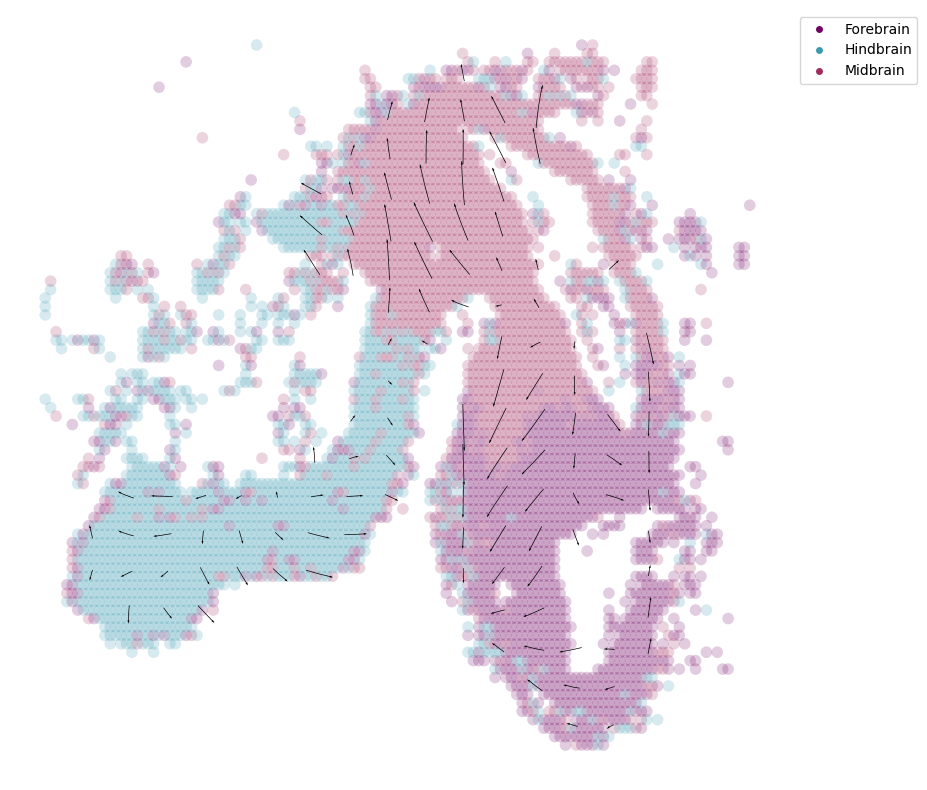

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
im = cd.cdplt.scatter_cell(ax,
                        df, 
                        colors=['Forebrain', 'Hindbrain', 'Midbrain'], 
                        alpha=0.2, 
                        s=70,
                        velocity=True,
                        legend = 'on',
                        min_mass = 2,
                        arrow_grid = (20,20))
ax.axis('off')
plt.show()